The purpose of this python notebook:
1. load acknowledge and convert as dataframe
2. identify run demarkations and save separately in BIDS convention
3. identify trials and events

Social influence experiment struction
- 6 run
   - 12 trials
     - each trial :
       - fixation
       - cue
       - expect
       - administer
       - actual

Collected data:
* Analog :: EDA
* Analog :: PPG
* Analog :: fMRI Trigger via biopac
* Analog :: TTL from medoc
* Digital :: trigger
* Digital :: fixation
* Digital :: cue
* Digital :: expect
* Digital :: administer
* Digital :: actual


# 0. libraries

In [1]:
# Load NeuroKit and other useful packages
import neurokit2 as nk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 9]  # Bigger images

# 1. file paths and properties

In [3]:
# You can see that I'm adding an absolute filepath.
# This is advised against, but I did 
filename ='/Users/h/Dropbox/projects_dropbox/spacetop_biopac/data/sub-0026/SOCIAL_spacetop_sub-0026_ses-01_task-social_ANISO.acq'
spacetop_data, spacetop_samplingrate = nk.read_acqknowledge(filename)

In [4]:
# spactop_data is a dataframe. Let's print the columns
spacetop_data.columns

Index(['Skin Conductance (EDA) - EDA100C-MRI', 'Pulse (PPG) - PPG100C',
       'fMRI Trigger - CBLCFMA - Current Feedba',
       'TSA2 TTL - CBLCFMA - Current Feedback M', 'trigger', 'fixation', 'cue',
       'expect', 'administer', 'actual', 'C15', 'C16'],
      dtype='object')


* print out column names etc
* plot runs


- column names:  Index(['Skin Conductance (EDA) - EDA100C-MRI', 'Pulse (PPG) - PPG100C',
       'fMRI Trigger - CBLCFMA - Current Feedba',
       'TSA2 TTL - CBLCFMA - Current Feedback M', 'trigger', 'fixation', 'cue',
       'expect', 'administer', 'actual', 'C15', 'C16'],
      dtype='object')
- data type:  <class 'pandas.core.frame.DataFrame'>
- values in administer column: [0. 5.]
- sampling rate:  2000.0


Text(0.5, 1.0, 'identify transitions')

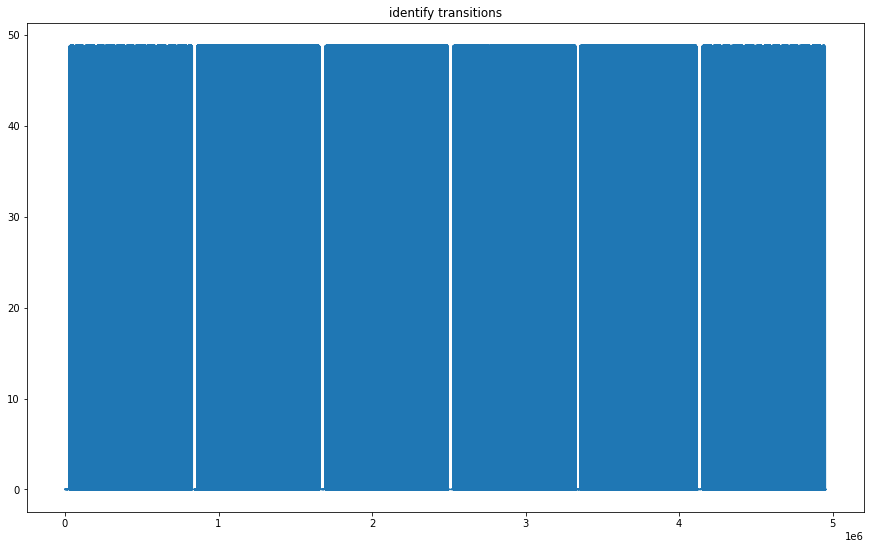

In [5]:
print('- column names: ', spacetop_data.columns)
print('- data type: ', type(spacetop_data))
print('- values in administer column:', np.unique(spacetop_data[ 'administer']))
print('- sampling rate: ', spacetop_samplingrate)
plt.plot(spacetop_data['fMRI Trigger - CBLCFMA - Current Feedba'])
plt.title("identify transitions")

## identify transitions

In [ ]:
# # np.unique(run_04[ 'TSA2 TTL - CBLCFMA - Current Feedback M'])
# mid_val = (np.max(spacetop_data['fMRI Trigger - CBLCFMA - Current Feedba']) - np.min(spacetop_data['fMRI Trigger - CBLCFMA - Current Feedba']))/2
# spacetop_data.loc[spacetop_data['fMRI Trigger - CBLCFMA - Current Feedba'] > mid_val, 'fmri_trigger'] = 5
# spacetop_data.loc[spacetop_data['fMRI Trigger - CBLCFMA - Current Feedba'] <= mid_val, 'fmri_trigger'] = 0

# start_df = spacetop_data[spacetop_data['fmri_trigger'] > spacetop_data[ 'fmri_trigger'].shift(1)]
# stop_df = spacetop_data[spacetop_data['fmri_trigger'] < spacetop_data[ 'fmri_trigger'].shift(1)]
# print(start_df.index)
# print(stop_df.index)
# spacetop_data[spacetop_data[ 'fmri_trigger'].diff() != 0].index

Int64Index([  27830,   28750,   29670,   30590,   31510,   32430,   33350,
              34270,   35190,   36110,
            ...
            4944323, 4945243, 4946163, 4947083, 4948003, 4948923, 4949843,
            4950763, 4951683, 4952603],
           dtype='int64', length=5189)
Int64Index([  27834,   28754,   29674,   30594,   31514,   32434,   33354,
              34274,   35194,   36114,
            ...
            4944327, 4945247, 4946167, 4947087, 4948007, 4948927, 4949847,
            4950767, 4951687, 4952607],
           dtype='int64', length=5189)


Int64Index([      0,   27830,   27834,   28750,   28754,   29670,   29674,
              30590,   30594,   31510,
            ...
            4948923, 4948927, 4949843, 4949847, 4950763, 4950767, 4951683,
            4951687, 4952603, 4952607],
           dtype='int64', length=10379)

## TTL

In [7]:
# np.unique(run_04[ 'TSA2 TTL - CBLCFMA - Current Feedback M'])
mid_val = (np.max(spacetop_data['TSA2 TTL - CBLCFMA - Current Feedback M']) - np.min(spacetop_data['TSA2 TTL - CBLCFMA - Current Feedback M']))/2
spacetop_data.loc[spacetop_data['TSA2 TTL - CBLCFMA - Current Feedback M'] > mid_val, 'TTL'] = 5
spacetop_data.loc[spacetop_data['TSA2 TTL - CBLCFMA - Current Feedback M'] <= mid_val, 'TTL'] = 0

start_df = spacetop_data[spacetop_data['TTL'] > spacetop_data[ 'TTL'].shift(1)]
stop_df = spacetop_data[spacetop_data['TTL'] < spacetop_data[ 'TTL'].shift(1)]
print(start_df.index)
print(stop_df.index)
spacetop_data[spacetop_data[ 'TTL'].diff() != 0].index

Int64Index([ 900987,  908848,  918849,  926480,  946380,  954560,  964561,
             972821, 1003142, 1010843,
            ...
            4139672, 4139689, 4139691, 4139697, 4139708, 4139742, 4139764,
            4139786, 4139796, 4139806],
           dtype='int64', length=104)
Int64Index([ 901197,  909053,  919053,  926734,  946589,  954765,  964769,
             973079, 1003343, 1011047,
            ...
            4139679, 4139690, 4139693, 4139700, 4139714, 4139747, 4139765,
            4139787, 4139797, 4139807],
           dtype='int64', length=104)


Int64Index([      0,  900987,  901197,  908848,  909053,  918849,  919053,
             926480,  926734,  946380,
            ...
            4139742, 4139747, 4139764, 4139765, 4139786, 4139787, 4139796,
            4139797, 4139806, 4139807],
           dtype='int64', length=209)

### grabbing the onset of "administer" events

In [8]:
# np.unique(run_04[ 'TSA2 TTL - CBLCFMA - Current Feedback M'])
mid_val = (np.max(spacetop_data['administer']) - np.min(spacetop_data['administer']))/2
spacetop_data.loc[spacetop_data['administer'] > mid_val, 'stimuli'] = 5
spacetop_data.loc[spacetop_data['administer'] <= mid_val, 'stimuli'] = 0

start_df = spacetop_data[spacetop_data['stimuli'] > spacetop_data[ 'stimuli'].shift(1)]
stop_df = spacetop_data[spacetop_data['stimuli'] < spacetop_data[ 'stimuli'].shift(1)]
print(start_df.index)
print(stop_df.index)
spacetop_data[spacetop_data[ 'stimuli'].diff() != 0].index

Int64Index([  60189,  121779,  197174,  258372,  328391,  390780,  453172,
             531372,  587186,  661781,  727172,  795572,  901068,  946433,
            1003183, 1058379, 1122388, 1194377, 1267174, 1323793, 1388167,
            1450804, 1539603, 1606419, 1733312, 1791912, 1858112, 1906712,
            1964115, 2056312, 2136512, 2209112, 2276312, 2346112, 2408712,
            2466512, 2571379, 2643378, 2698578, 2768378, 2841978, 2921978,
            2999978, 3059978, 3122578, 3184778, 3243978, 3296978, 3388880,
            3451436, 3514806, 3580440, 3675671, 3740829, 3813899, 3872480,
            3928497, 3995044, 4077476, 4216367, 4276155, 4336343, 4416941,
            4493135, 4542554, 4601343, 4659364, 4714752, 4778542, 4855737,
            4926134],
           dtype='int64')
Int64Index([  60332,  121793,  197184,  258382,  328406,  390791,  453182,
             531383,  587212,  661790,  727183,  795582,  918906,  964307,
            1021106, 1076306, 1140307, 1212306, 1285

Int64Index([      0,   60189,   60332,  121779,  121793,  197174,  197184,
             258372,  258382,  328391,
            ...
            4659364, 4659375, 4714752, 4714761, 4778542, 4778552, 4855737,
            4855747, 4926134, 4926144],
           dtype='int64', length=143)

In [9]:
len(start_df)

71

# 2. identify transitions with the "trigger" event instead of TTL

In [10]:
# np.unique(run_04[ 'TSA2 TTL - CBLCFMA - Current Feedback M'])
mid_val = (np.max(spacetop_data['trigger']) - np.min(spacetop_data['trigger']))/2
spacetop_data.loc[spacetop_data['trigger'] > mid_val, 'fmri_trigger'] = 5
spacetop_data.loc[spacetop_data['trigger'] <= mid_val, 'fmri_trigger'] = 0

start_df = spacetop_data[spacetop_data['fmri_trigger'] > spacetop_data[ 'fmri_trigger'].shift(1)]
stop_df = spacetop_data[spacetop_data['fmri_trigger'] < spacetop_data[ 'fmri_trigger'].shift(1)]
print(start_df.index)
print(stop_df.index)
spacetop_data[spacetop_data[ 'fmri_trigger'].diff() != 0].index

Int64Index([28782, 858718, 1695354, 2528418, 3354400, 4151326], dtype='int64')
Int64Index([826244, 1656426, 2493190, 3326089, 4113693, 4949408], dtype='int64')


Int64Index([      0,   28782,  826244,  858718, 1656426, 1695354, 2493190,
            2528418, 3326089, 3354400, 4113693, 4151326, 4949408],
           dtype='int64')

In [14]:
len(spacetop_data[spacetop_data[ 'fmri_trigger'].diff() != 0].index)

13

## identify which files have TTL signals

In [ ]:
# run onsets
mid_val = (np.max(spacetop_data['trigger']) - np.min(spacetop_data['trigger']))/2
spacetop_data.loc[spacetop_data['trigger'] > mid_val, 'fmri_trigger'] = 5
spacetop_data.loc[spacetop_data['trigger'] <= mid_val, 'fmri_trigger'] = 0

start_df = spacetop_data[spacetop_data['fmri_trigger'] > spacetop_data[ 'fmri_trigger'].shift(1)].index
stop_df = spacetop_data[spacetop_data['fmri_trigger'] < spacetop_data[ 'fmri_trigger'].shift(1)].index
# TTL onsets
mid_val = (np.max(spacetop_data['TSA2 TTL - CBLCFMA - Current Feedback M']) - np.min(spacetop_data['TSA2 TTL - CBLCFMA - Current Feedback M']))/2
spacetop_data.loc[spacetop_data['TSA2 TTL - CBLCFMA - Current Feedback M'] > mid_val, 'TTL'] = 5
spacetop_data.loc[spacetop_data['TSA2 TTL - CBLCFMA - Current Feedback M'] <= mid_val, 'TTL'] = 0

# start_ttl = spacetop_data[spacetop_data['TTL'] > spacetop_data[ 'TTL'].shift(1)].index
# stop_ttl = spacetop_data[spacetop_data['TTL'] < spacetop_data[ 'TTL'].shift(1)].index
# spacetop_data[spacetop_data[ 'TTL'].diff() != 0].index

# ddataframe
df_transition = pd.DataFrame({
    'start_df': start_df, 
    'stop_df': stop_df,
    # 'TTL': np.nan,
})

# spacetop_data.iloc[df_transition.start_df[0]:df_transition.stop_df[0],spacetop_data.columns.get_loc('TTL')].any
ttl_bool = []
for r in range(len(start_df)):
    bool_val = np.unique(spacetop_data.iloc[df_transition.start_df[r]:df_transition.stop_df[r],spacetop_data.columns.get_loc('TTL')]).any()
    ttl_bool.append(bool_val)

runs_with_ttl = [i for i, x in enumerate(ttl_bool) if x]

## 2-1. define run 05

In [43]:
run_num = 5
run_05 = spacetop_data[start_df.index[run_num-1]: stop_df.index[run_num-1]]
r05 = run_05.reset_index()

## 2-2. for future use - process EDA, PPG data

In [16]:
df, info = nk.bio_process(ppg = r05['Pulse (PPG) - PPG100C'], 
                          eda=r05['Skin Conductance (EDA) - EDA100C-MRI'], 
                          sampling_rate=100)
# 'Skin Conductance (EDA) - EDA100C-MRI', 'Pulse (PPG) - PPG100C',

In [ ]:
df.columns

Index(['EDA_Raw', 'EDA_Clean', 'EDA_Tonic', 'EDA_Phasic', 'SCR_Onsets',
       'SCR_Peaks', 'SCR_Height', 'SCR_Amplitude', 'SCR_RiseTime',
       'SCR_Recovery', 'SCR_RecoveryTime', 'PPG_Raw', 'PPG_Clean', 'PPG_Rate',
       'PPG_Peaks'],
      dtype='object')

## 2-3. run 05 events

try plotting r05 and make sure you have the expected number of events

In [44]:
r05

,index,Skin Conductance (EDA) - EDA100C-MRI,Pulse (PPG) - PPG100C,fMRI Trigger - CBLCFMA - Current Feedba,TSA2 TTL - CBLCFMA - Current Feedback M,trigger,fixation,cue,expect,administer,actual,C15,C16,TTL,onset,fmri_trigger,stimuli
0,3354400,1.611327,-0.048523,0.006104,0.332642,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
1,3354401,1.611327,-0.048218,0.012207,0.357056,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
2,3354402,1.606749,-0.048523,0.009155,0.335693,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
3,3354403,1.612853,-0.048828,0.009155,0.296021,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
4,3354404,1.612853,-0.049438,0.009155,0.363159,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759288,4113688,1.628112,-0.020447,0.006104,0.357056,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
759289,4113689,1.631163,-0.019531,0.009155,0.347900,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
759290,4113690,1.629638,-0.020752,0.009155,0.350952,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
759291,4113691,1.632689,-0.021057,0.003052,0.302124,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0


In [45]:
start_expect = r05[r05['expect'] > r05[ 'expect'].shift(1)]
print(start_expect.index)
start_actual = r05[r05['expect'] > r05[ 'expect'].shift(1)]
print(start_actual.index)

Int64Index([ 14409,  85608, 149008, 214609, 266608, 302824, 365624, 441028,
            504025, 557225, 625425, 707828],
           dtype='int64')
Int64Index([ 54808, 123613, 186208, 246408, 286824, 342825, 414024, 486025,
            538425, 600625, 692225, 751024],
           dtype='int64')


In [47]:
start_stim = r05[r05['stimuli'] > r05[ 'stimuli'].shift(1)]
stop_stim= r05[r05['stimuli'] < r05[ 'stimuli'].shift(1)]
print(start_stim.index)
print(stop_stim.index)

Int64Index([ 34480,  97036, 160406, 226040, 321271, 386429, 459499, 518080,
            574097, 640644, 723076],
           dtype='int64')
Int64Index([ 52364, 114963, 178362, 243962, 339178, 404378, 477379, 535979,
            591979, 658579, 740979],
           dtype='int64')


In [57]:
events = nk.events_create(event_onsets=list(start_stim.index), 
event_durations = list((stop_stim.index-start_stim.index)/spacetop_samplingrate))

In [50]:
events

{'onset': [34480,
  97036,
  160406,
  226040,
  321271,
  386429,
  459499,
  518080,
  574097,
  640644,
  723076],
 'duration': [8.942,
  8.9635,
  8.978,
  8.961,
  8.9535,
  8.9745,
  8.94,
  8.9495,
  8.941,
  8.9675,
  8.9515],
 'label': array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'],
       dtype='<U21')}

In [62]:
print(start_expect.index/spacetop_samplingrate)
print(start_actual.index/spacetop_samplingrate)

Float64Index([  7.2045,   42.804,   74.504, 107.3045,  133.304,  151.412,
               182.812,  220.514, 252.0125, 278.6125, 312.7125,  353.914],
             dtype='float64')
Float64Index([  27.404,  61.8065,   93.104,  123.204,  143.412, 171.4125,
               207.012, 243.0125, 269.2125, 300.3125, 346.1125,  375.512],
             dtype='float64')


In [67]:
events['onset']/spacetop_samplingrate

array([ 17.24  ,  48.518 ,  80.203 , 113.02  , 160.6355, 193.2145,
       229.7495, 259.04  , 287.0485, 320.322 , 361.538 ])

In [ ]:
start_stim = r05[r05['stimuli'] > r05[ 'stimuli'].shift(1)]
stop_stim= r05[r05['stimuli'] < r05[ 'stimuli'].shift(1)]

In [433]:
start_expect = r05[r05['expect'] > r05[ 'expect'].shift(1)]
start_actual = r05[r05['actual'] > r05[ 'actual'].shift(1)]
stop_actual= r05[r05['actual'] < r05[ 'actual'].shift(1)]


start_stim = r05[r05['stimuli'] > r05[ 'stimuli'].shift(1)]
stop_stim= r05[r05['stimuli'] < r05[ 'stimuli'].shift(1)]

expect_start = start_expect.index/spacetop_samplingrate
actual_stop = stop_actual.index/spacetop_samplingrate
stim_start = start_stim.index/spacetop_samplingrate
stim_end = stop_stim.index/spacetop_samplingrate
stim_onset = events['onset']/spacetop_samplingrate


# build pandas dataframe
df_onset = pd.DataFrame({
    'expect_start': expect_start, 
    'actual_end': actual_stop,
    'stim_start': np.nan,
    'stim_end':np.nan
})
# check dataframe
# df.head() 

df_stim = pd.DataFrame({
    'stim_start': stim_start, 
    'stim_end': stim_end
    })

# RESOURCE: https://stackoverflow.com/questions/62300474/filter-all-rows-in-a-pandas-dataframe-where-a-given-value-is-between-two-columnv
# for loop 
for i in range(len(df_stim)):
    idx = pd.IntervalIndex.from_arrays(
        df_onset['expect_start'], df_onset['actual_end'])
    start_val = df_stim.iloc[i][df_stim.columns.get_loc('stim_start')]
    interval_idx = df_onset[idx.contains(start_val)].index[0]
    df_onset.iloc[interval_idx, df_onset.columns.get_loc('stim_start')] = start_val

    end_val = df_stim.iloc[i][df_stim.columns.get_loc('stim_end')]
    interval_idx = df_onset[idx.contains(end_val)].index[0]
    df_onset.iloc[interval_idx, df_onset.columns.get_loc('stim_end')] = end_val
    print(f"this is the {i}-th iteration. stim value is {start_val}, and is in between index {interval_idx}")


this is the 0-th iteration. stim value is 17.24, and is in between index 0
this is the 1-th iteration. stim value is 48.518, and is in between index 1
this is the 2-th iteration. stim value is 80.203, and is in between index 2
this is the 3-th iteration. stim value is 113.02, and is in between index 3
this is the 4-th iteration. stim value is 160.6355, and is in between index 5
this is the 5-th iteration. stim value is 193.2145, and is in between index 6
this is the 6-th iteration. stim value is 229.7495, and is in between index 7
this is the 7-th iteration. stim value is 259.04, and is in between index 8
this is the 8-th iteration. stim value is 287.0485, and is in between index 9
this is the 9-th iteration. stim value is 320.322, and is in between index 10
this is the 10-th iteration. stim value is 361.538, and is in between index 11


In [434]:

df_onset

,expect_start,actual_end,stim_start,stim_end
0,7.2045,30.4545,17.2400,26.1820
1,42.8040,64.5575,48.5180,57.4815
2,74.5040,96.5710,80.2030,89.1810
3,107.3045,125.8710,113.0200,121.9810
4,133.3040,145.9790,NaN,NaN
5,151.4120,174.7970,160.6355,169.5890
6,182.8120,209.5455,193.2145,202.1890
7,220.5140,245.3455,229.7495,238.6895
8,252.0125,271.9835,259.0400,267.9895
9,278.6125,303.2125,287.0485,295.9895


In [442]:
# calculate TTL onsets
start_ttl = r05[r05['TTL'] > r05[ 'TTL'].shift(1)]
stop_ttl = r05[r05['TTL'] < r05[ 'TTL'].shift(1)]
ttl_onsets =   list(start_ttl.index + (stop_ttl.index-start_ttl.index)/2)/spacetop_samplingrate
print(f"ttl onsets: {ttl_onsets}, length of ttl onset is : {len(ttl_onsets)}")

# define empty TTL data frame
df_ttl = pd.DataFrame(np.nan, index=np.arange(len(df_onset)),columns= ['ttl_1', 'ttl_2','ttl_3', 'ttl_4'])

# identify which set of TTLs fall between expect and actual 
pad = 1 # seconds. you may increase the value to have a bigger event search interval
df_onset['expect_start_interval'] = df_onset['expect_start']-pad
df_onset['actual_end_interval'] = df_onset['actual_end']+pad
idx = pd.IntervalIndex.from_arrays(
            df_onset['expect_start_interval'], df_onset['actual_end_interval'])

for i in range(len(ttl_onsets)):
    
    val = ttl_onsets[i]
    print(f"{i}-th value: {val}")
    empty_cols = []
    interval_idx = df_onset[idx.contains(val)].index[0]
    print(f"\t\t* interval index: {interval_idx}")
    mask = df_ttl.loc[[interval_idx]].isnull()
    empty_cols = list(itertools.compress(np.array(df_ttl.columns.to_list()), mask.values[0]))
    print(f"\t\t* empty columns: {empty_cols}")
    df_ttl.loc[df_ttl.index[interval_idx], str(empty_cols[0])] = val
    print(f"\t\t* this is the row where the value -- {val} -- falls. on the {interval_idx}-th row")


ttl onsets: [ 17.2645   21.21875  26.21875  30.12175  48.55075  52.44625  57.4465
  61.4035   80.24725  84.4865   89.488    93.74075 113.05875 117.248
 122.248   126.501   143.35175 160.67025 165.16375 170.164   174.718
 193.256   197.71525 202.7165  207.28325 229.77775 233.99175 238.992
 243.296   259.07375 262.948   267.94875 272.00125 287.075   291.5805
 296.5795  301.17725 320.3565  324.31675 329.316   333.38875 361.56825
 365.8435  370.84275 375.14575], length of ttl onset is : 45
0-th value: 17.2645
		* interval index: 0
		* empty columns: ['ttl_1', 'ttl_2', 'ttl_3', 'ttl_4']
		* this is the row where the value -- 17.2645 -- falls. on the 0-th row
1-th value: 21.21875
		* interval index: 0
		* empty columns: ['ttl_2', 'ttl_3', 'ttl_4']
		* this is the row where the value -- 21.21875 -- falls. on the 0-th row
2-th value: 26.21875
		* interval index: 0
		* empty columns: ['ttl_3', 'ttl_4']
		* this is the row where the value -- 26.21875 -- falls. on the 0-th row
3-th value: 30.1217

In [448]:
print("df_ttl____________________________")
print(df_ttl.head())
print("df_onset____________________________")
print(df_onset.head())

df_ttl____________________________
       ttl_1      ttl_2      ttl_3      ttl_4
0   17.26450   21.21875   26.21875   30.12175
1   48.55075   52.44625   57.44650   61.40350
2   80.24725   84.48650   89.48800   93.74075
3  113.05875  117.24800  122.24800  126.50100
4  143.35175        NaN        NaN        NaN
df_onset____________________________
   expect_start  actual_end  stim_start  stim_end  expect_start_interval  \
0        7.2045     30.4545      17.240   26.1820                 6.2045   
1       42.8040     64.5575      48.518   57.4815                41.8040   
2       74.5040     96.5710      80.203   89.1810                73.5040   
3      107.3045    125.8710     113.020  121.9810               106.3045   
4      133.3040    145.9790         NaN       NaN               132.3040   

   actual_end_interval  
0              31.4545  
1              65.5575  
2              97.5710  
3             126.8710  
4             146.9790  


In [452]:
## merge two final dataframesx``
final_df = pd.merge(df_onset, df_ttl, left_index=True, right_index=True)
final_df['ttl_r1'] = final_df['ttl_1'] - final_df['stim_start']
final_df['ttl_r2'] = final_df['ttl_2'] - final_df['stim_start']
final_df['ttl_r3'] = final_df['ttl_3'] - final_df['stim_start']
final_df['ttl_r4'] = final_df['ttl_4'] - final_df['stim_start']
# df_onset.merge(df_ttl, how = 'left', on = 'index')

In [453]:
final_df

,expect_start,actual_end,stim_start,stim_end,expect_start_interval,actual_end_interval,ttl_1,ttl_2,ttl_3,ttl_4,ttl_r1,ttl_r2,ttl_r3,ttl_r4
0,7.2045,30.4545,17.2400,26.1820,6.2045,31.4545,17.26450,21.21875,26.21875,30.12175,0.02450,3.97875,8.97875,12.88175
1,42.8040,64.5575,48.5180,57.4815,41.8040,65.5575,48.55075,52.44625,57.44650,61.40350,0.03275,3.92825,8.92850,12.88550
2,74.5040,96.5710,80.2030,89.1810,73.5040,97.5710,80.24725,84.48650,89.48800,93.74075,0.04425,4.28350,9.28500,13.53775
3,107.3045,125.8710,113.0200,121.9810,106.3045,126.8710,113.05875,117.24800,122.24800,126.50100,0.03875,4.22800,9.22800,13.48100
4,133.3040,145.9790,NaN,NaN,132.3040,146.9790,143.35175,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,151.4120,174.7970,160.6355,169.5890,150.4120,175.7970,160.67025,165.16375,170.16400,174.71800,0.03475,4.52825,9.52850,14.08250
6,182.8120,209.5455,193.2145,202.1890,181.8120,210.5455,193.25600,197.71525,202.71650,207.28325,0.04150,4.50075,9.50200,14.06875
7,220.5140,245.3455,229.7495,238.6895,219.5140,246.3455,229.77775,233.99175,238.99200,243.29600,0.02825,4.24225,9.24250,13.54650
8,252.0125,271.9835,259.0400,267.9895,251.0125,272.9835,259.07375,262.94800,267.94875,272.00125,0.03375,3.90800,8.90875,12.96125
9,278.6125,303.2125,287.0485,295.9895,277.6125,304.2125,287.07500,291.58050,296.57950,301.17725,0.02650,4.53200,9.53100,14.12875


(-5.0, 20.0)

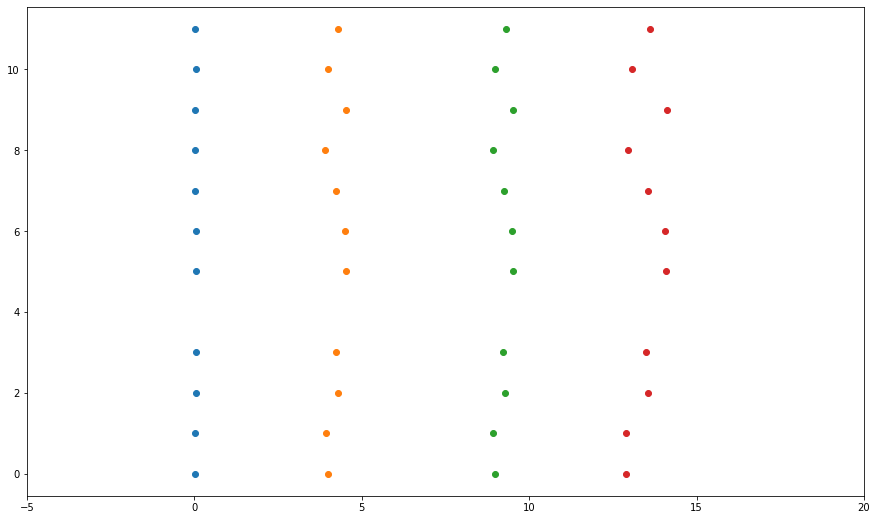

In [461]:
plt.plot(final_df.ttl_r1, final_df.index, linestyle="",marker="o")
plt.plot(final_df.ttl_r2, final_df.index, linestyle="",marker="o")
plt.plot(final_df.ttl_r3, final_df.index, linestyle="",marker="o")
plt.plot(final_df.ttl_r4, final_df.index, linestyle="",marker="o")
plt.xlim([-5, 20])

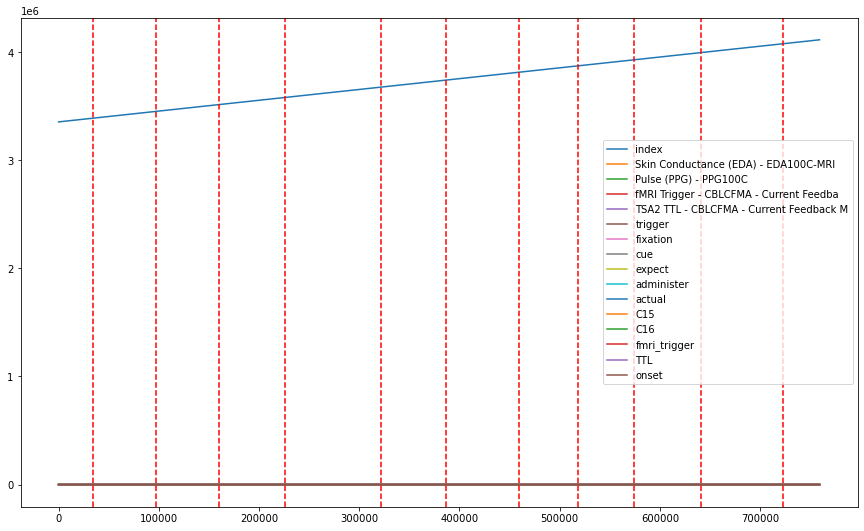

In [ ]:
# d05 = nk.signal_resample(signal = r05, 
# sampling_rate = 2000, 
# desired_sampling_rate = 250,
# method="interpolation")
# events = nk.events_find(event_channel=r05[ 'administer'],
#                         threshold_keep='below',
#                         event_conditions = list(range(12)),
#                         duration = 9
               
#                     )

epochs = nk.epochs_create(r05, events, 
sampling_rate=2000, 
epochs_start=-1, epochs_end=15,
baseline_correction=True)
plot = nk.events_plot(events, r05)

In [16]:
run_num = 5
run = f"run-{run_num + 1:02d}"
print(run)

run-06


0 1
1 2
2 3
3 4
4 5
5 6
6 7
7 8
8 9
9 10
10 11


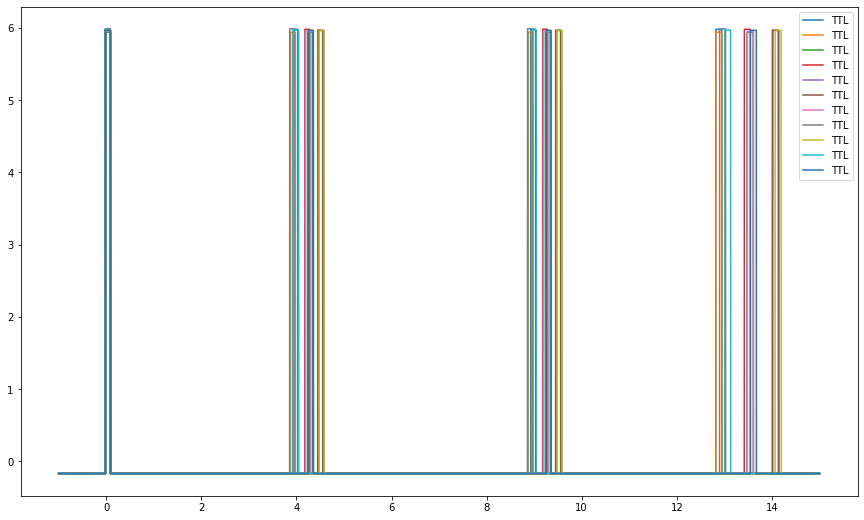

In [ ]:
# epochs = nk.epochs_create(r05, events,  epochs_start=-1, epochs_end=1)
for i, epoch in enumerate(epochs):
    print(i,epoch)
    # epoch = epochs[epoch]  # iterate epochs",
    epoch = epochs[epoch]['TTL']  # Select relevant columns",
    title = 'ttl'
    # title = events['condition'][i] # get title from condition list",

    nk.standardize(epoch).plot(legend=True)  # Plot scaled signals"

In [25]:
start_ttl = r05[r05['TTL'] > r05[ 'TTL'].shift(1)]
stop_ttl = r05[r05['TTL'] < r05[ 'TTL'].shift(1)]
print(start_ttl.index)
print(stop_ttl.index)
ttl_onsets =   list(start_ttl.index + (stop_ttl.index-start_ttl.index)/2)/spacetop_samplingrate
print(ttl_onsets)
len(ttl_onsets)

Int64Index([ 34425,  42335,  52335,  60117,  96997, 104789, 114789, 122678,
            160390, 168871, 178872, 187351, 226013, 234394, 244394, 252875,
            286573, 321236, 330225, 340226, 349307, 386408, 395328, 405329,
            414440, 459451, 467881, 477882, 486462, 518043, 525794, 535796,
            543876, 574045, 583057, 593057, 602228, 640609, 648529, 658530,
            666651, 723032, 731583, 741583, 750165],
           dtype='int64')
Int64Index([ 34633,  42540,  52540,  60370,  97206, 104996, 114997, 122936,
            160599, 169075, 179080, 187612, 226222, 234598, 244598, 253129,
            286834, 321445, 330430, 340430, 349565, 386616, 395533, 405537,
            414693, 459660, 468086, 478086, 486722, 518252, 525998, 535999,
            544129, 574255, 583265, 593261, 602481, 640817, 648738, 658734,
            666904, 723241, 731791, 741788, 750418],
           dtype='int64')
[ 17.2645   21.21875  26.21875  30.12175  48.55075  52.44625  57.4465
  61.4035   

45

In [30]:
start_ad = r05[r05['administer'] > r05[ 'administer'].shift(1)]
stop_ad = r05[r05['administer'] < r05[ 'administer'].shift(1)]
print(start_ad.index)
print(stop_ad.index)
# ad_onsets =   list(start_ad.index + (stop_ad.index-start_ad.index)/2)/spacetop_samplingrate
# print(ad_onsets)
# len(ad_onsets)
ad_dur = (stop_ad.index-start_ad.index)/spacetop_samplingrate
print(ad_dur)

Int64Index([ 34480,  97036, 160406, 226040, 321271, 386429, 459499, 518080,
            574097, 640644, 723076],
           dtype='int64')
Int64Index([ 52364, 114963, 178362, 243962, 339178, 404378, 477379, 535979,
            591979, 658579, 740979],
           dtype='int64')
Float64Index([ 8.942, 8.9635,  8.978,  8.961, 8.9535, 8.9745,   8.94, 8.9495,
               8.941, 8.9675, 8.9515],
             dtype='float64')


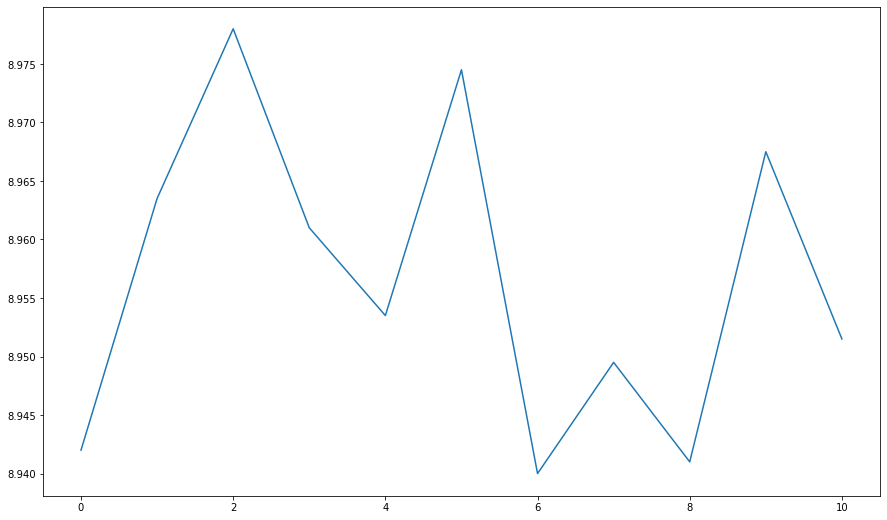

In [31]:
plt.plot(ad_dur)

In [ ]:
epochs['1']

,index,Skin Conductance (EDA) - EDA100C-MRI,Pulse (PPG) - PPG100C,fMRI Trigger - CBLCFMA - Current Feedba,TSA2 TTL - CBLCFMA - Current Feedback M,trigger,fixation,cue,expect,administer,actual,C15,C16,fmri_trigger,TTL,Index,Label,Condition
-30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-749.5,1,0
-29.979993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-748.5,1,0
-29.959987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-747.5,1,0
-29.939980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-746.5,1,0
-29.919973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-745.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29.919973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2245.5,1,0
29.939980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2246.5,1,0
29.959987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2247.5,1,0
29.979993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2248.5,1,0


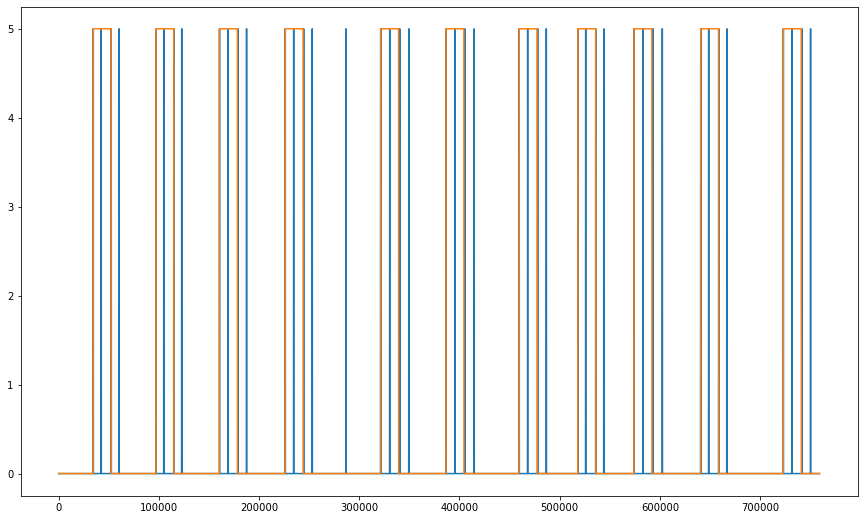

In [131]:
# plt.plot(r05[ 'TSA2 TTL - CBLCFMA - Current Feedback M'])
plt.plot(r05['TTL'])
plt.plot( r05['administer'])

In [ ]:
start_ad = r05[r05['administer'] > r05[ 'administer'].shift(1)]
stop_ad = r05[r05['administer'] < r05[ 'administer'].shift(1)]


/Users/h/anaconda3/envs/biopac/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/h/anaconda3/envs/biopac/lib/python3.9/site-packages/IPython/core/pylabtools.py:134: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


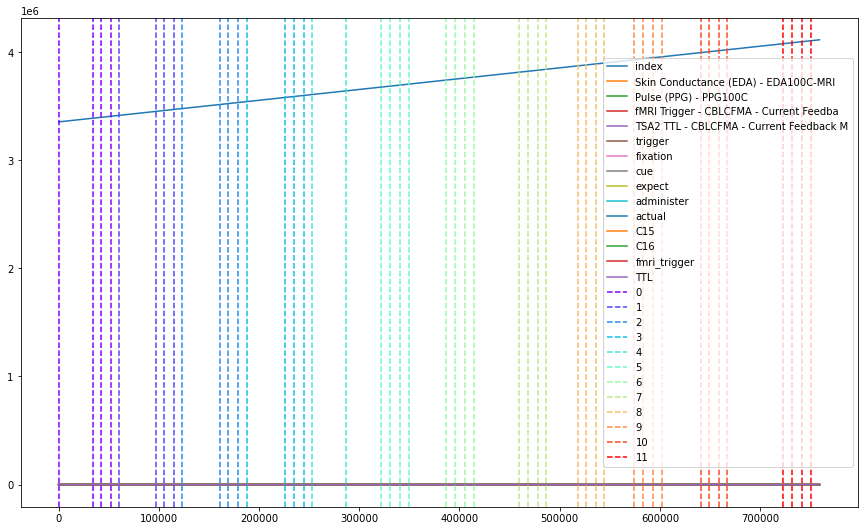

In [ ]:
# new_05 = run_04.reset_index()
condition_list = [1,1,1,1,
2,2,2,2,
3,3,3,3,
4,4,4,4,
5,5,
6,6,6,6,
7,7,7,7,
8,8,8,8,
9,9,9,9,
10,10,10,10,
11,11,11,11,
12,12,12,12]
events = nk.events_find(event_channel=r05[ 'TTL'],
                        threshold_keep='high',
                        event_conditions = condition_list

                    )

events
plot = nk.events_plot(events, r05)

0 1
1 2
2 3
3 4
4 5
5 6
6 7
7 8
8 9
9 10
10 11
11 12
12 13
13 14
14 15
15 16
16 17
17 18
18 19
19 20
20 21
21 22
22 23
23 24
24 25
25 26
26 27
27 28
28 29
29 30
30 31
31 32
32 33
33 34
34 35
35 36
36 37
37 38
38 39
39 40
40 41
41 42
42 43
43 44
44 45
45 46


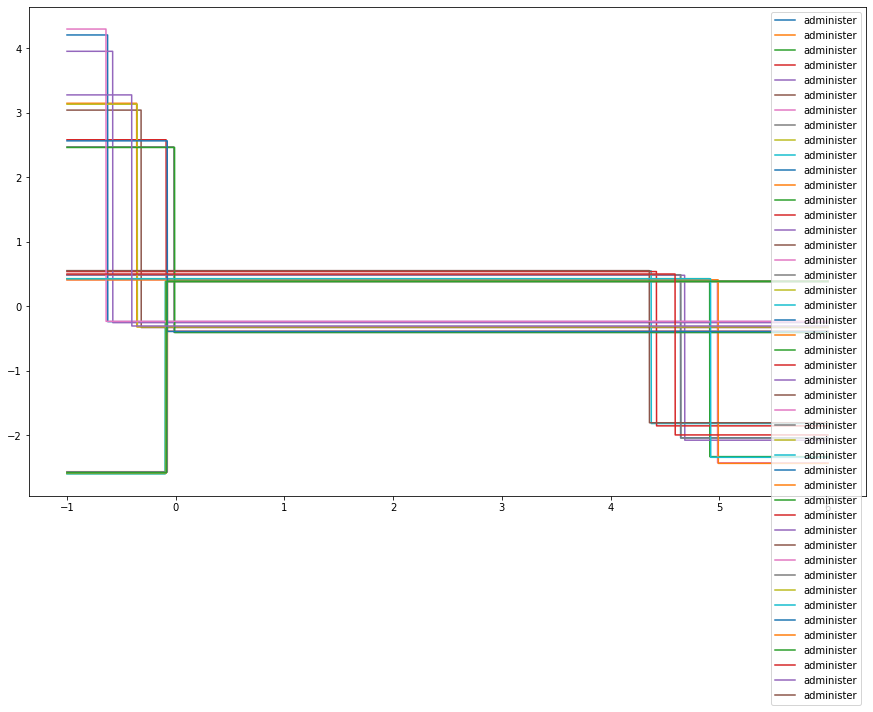

In [ ]:
epochs = nk.epochs_create(r05, events, sampling_rate=2000, epochs_start=-1, epochs_end=6)
for i, epoch in enumerate(epochs):
    print(i,epoch)
    # epoch = epochs[epoch]  # iterate epochs",
    epoch = epochs[epoch]['administer']  # Select relevant columns",
    title = 'ttl'
    # title = events['condition'][i] # get title from condition list",

    nk.standardize(epoch).plot(legend=True)  # Plot scaled signals"

# TODO
# order the TTLs
# every 4th is part of the same event
# numerically order

/Users/h/anaconda3/envs/biopac/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/h/anaconda3/envs/biopac/lib/python3.9/site-packages/IPython/core/pylabtools.py:134: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


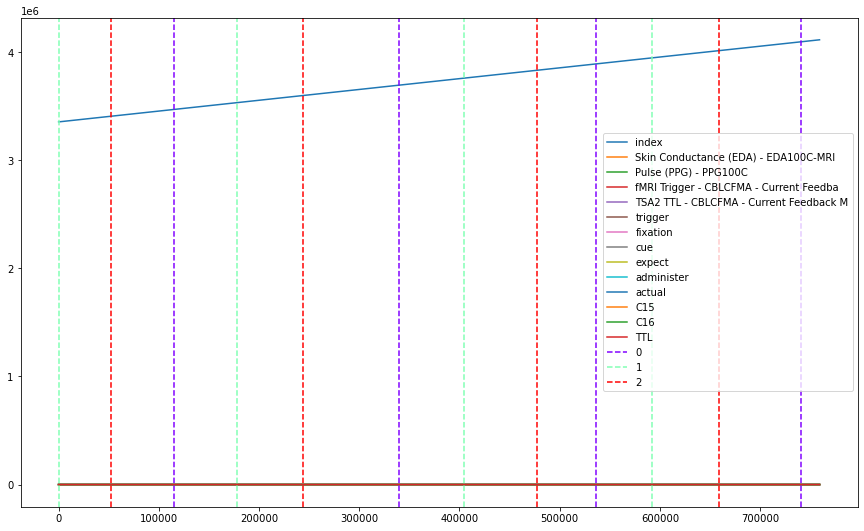

In [ ]:
new_05 = run_04.reset_index()
condition_list = ["h", 'm', 'l',"h", 'm', 'l',"h", 'm', 'l',"h", 'm', 'l']
events = nk.events_find(event_channel=new_05[ 'administer'],
                        threshold_keep='higher',
                        event_conditions = condition_list

                    )

events
plot = nk.events_plot(events, new_05)

0 1
1 2
2 3
3 4
4 5
5 6
6 7
7 8
8 9
9 10
10 11
11 12


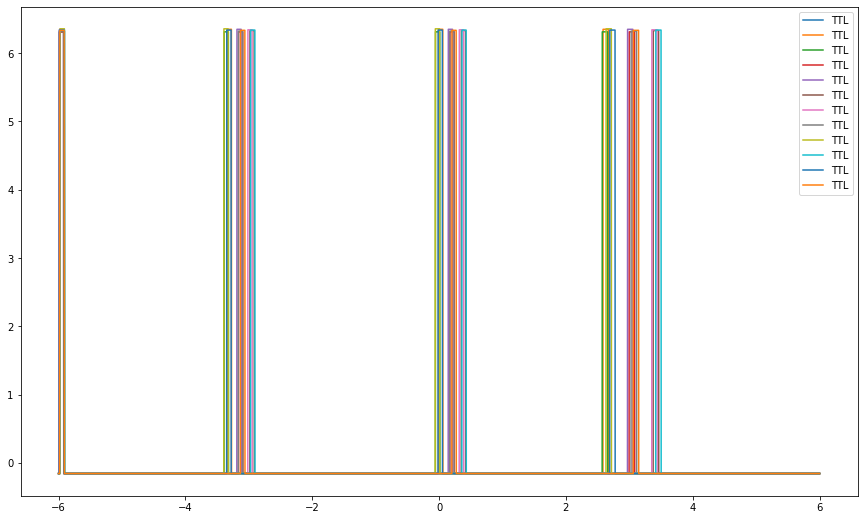

In [ ]:
epochs = nk.epochs_create(new_05, events, sampling_rate=3000, epochs_start=-6, epochs_end=6)
for i, epoch in enumerate(epochs):
    print(i,epoch)
    # epoch = epochs[epoch]  # iterate epochs",
    epoch = epochs[epoch]['TTL']  # Select relevant columns",
    title = 'ttl'
    # title = events['condition'][i] # get title from condition list",

    nk.standardize(epoch).plot(legend=True)  # Plot scaled signals"

In [ ]:
run_04

,Skin Conductance (EDA) - EDA100C-MRI,Pulse (PPG) - PPG100C,fMRI Trigger - CBLCFMA - Current Feedba,TSA2 TTL - CBLCFMA - Current Feedback M,trigger,fixation,cue,expect,administer,actual,C15,C16,TTL
3354399,1.611327,-0.048828,0.009155,0.311279,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3354400,1.611327,-0.048523,0.006104,0.332642,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3354401,1.611327,-0.048218,0.012207,0.357056,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3354402,1.606749,-0.048523,0.009155,0.335693,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3354403,1.612853,-0.048828,0.009155,0.296021,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4113689,1.631163,-0.019531,0.009155,0.347900,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4113690,1.629638,-0.020752,0.009155,0.350952,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4113691,1.632689,-0.021057,0.003052,0.302124,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4113692,1.629638,-0.020447,0.009155,0.259399,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


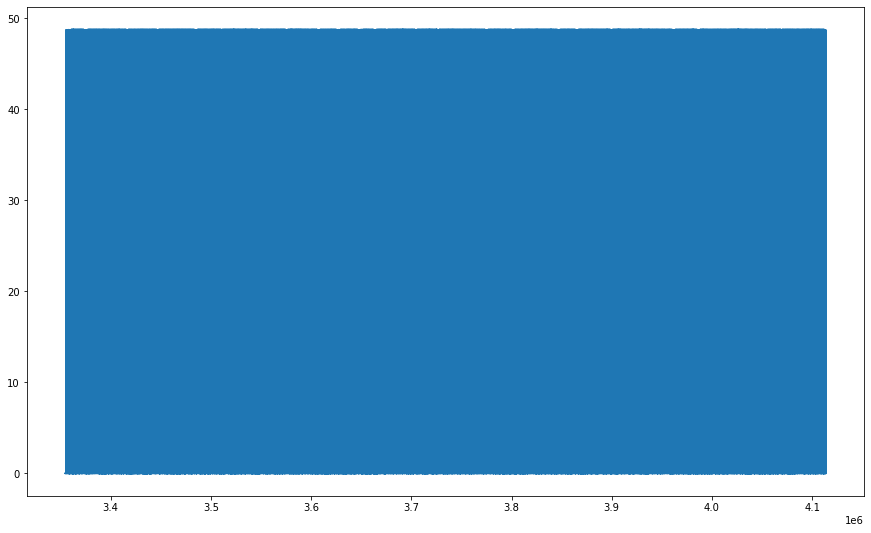

In [ ]:
plt.plot(run_04['fMRI Trigger - CBLCFMA - Current Feedba'])

epochs = nk.epochs_create(df, events, sampling_rate=100, epochs_start=-1, epochs_end=6)

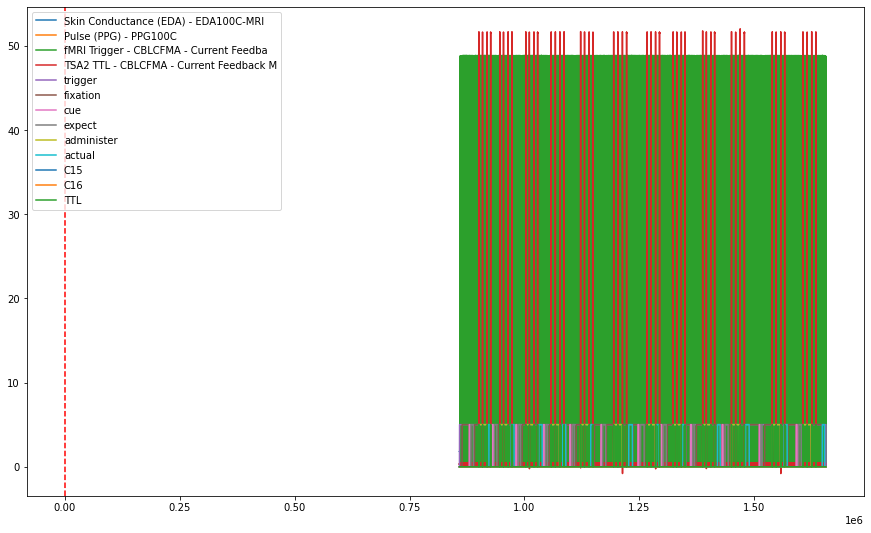

In [ ]:
plot = nk.events_plot(events, run_02)

In [ ]:
data, info = nk.bio_process(eda=spacetop_data["Skin Conductance (EDA) - EDA100C-MRI"], 
                            ppg=spacetop_data["Pulse (PPG) - PPG100C"],
                            
                            sampling_rate = spacetop_samplingrate
                           )

KeyboardInterrupt: 

<AxesSubplot:>

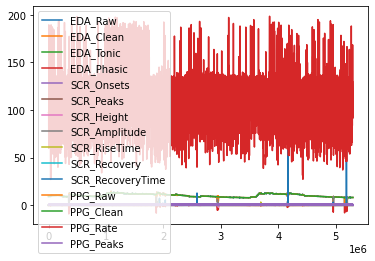

In [ ]:
data.plot()

# eda

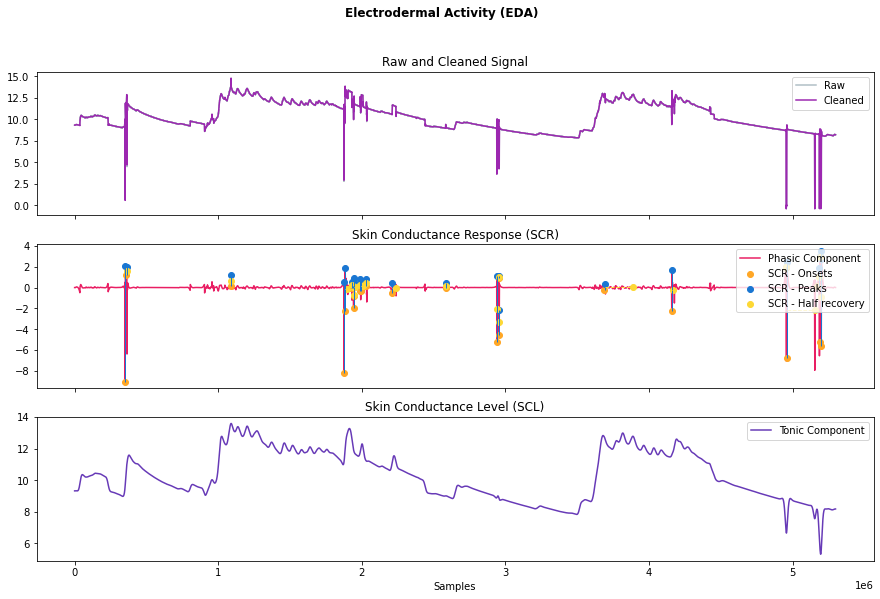

In [ ]:
spacetop_eda_plot = nk.eda_plot(data)

# PPG

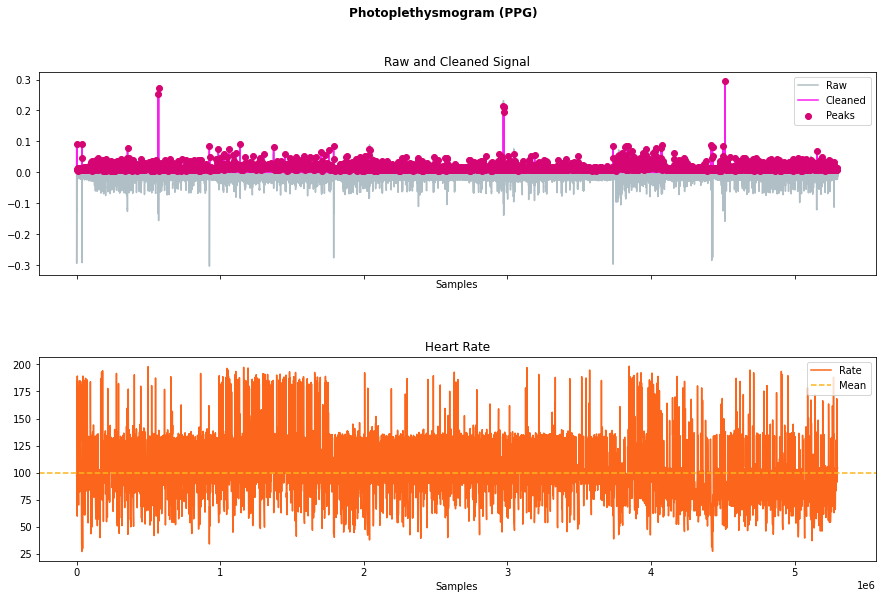

In [ ]:
spacetop_ppg_plot = nk.ppg_plot(data)